In [1]:
# import module 
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as im
from PIL import Image
from mpl_toolkits.basemap import Basemap


In [38]:
#RGB SPecial for VA but we use for smoke detection
#reference: https://issuu.com/antasena/docs/vol.4_no.1_januari-juni2019_opt/s/10202752
#reference: https://ulil-hidayat.github.io/2023/07/04/visualize-rgb.html

def rgb1(data, PATH, title, number, circles=[]):
    ds = Dataset(data,'r')

    b11 = ds.variables['tbb_11'][:]
    b13 = ds.variables['tbb_13'][:]
    b15 = ds.variables['tbb_15'][:]
    lons = ds.variables['longitude'][:]
    lats = ds.variables['latitude'][:]

    #RGB Composition
    red = b15-b13
    green = b13-b11
    blue = b13

    def norm(band):
        band_min, band_max = np.nanpercentile(band,2), np.nanpercentile(band,98)
        return ((band-band_min)/(band_max-band_min))

    r = norm(red.astype(float))
    g = norm(green.astype(float))
    b = norm(blue.astype(float))

    rgb = np.dstack((r,g,b))
    extent = [80, 200, -60, 60]

    below,above,left,right = -3, 2, 97, 103 #AOI 
    m = Basemap(projection='cyl',resolution='h',llcrnrlat=below,llcrnrlon=left,urcrnrlat=above,urcrnrlon=right)
    m.drawcoastlines(color='white')
    #m.drawparallels(np.arange(-90,90,3),labels=[1,0,0,1],dashes = [5,5], fontsize=8)
    #m.drawmeridians(np.arange(-180,180,3),labels=[1,0,0,1],dashes = [5,5],fontsize=8)

    # Plot red circles
    for circle in circles:
        lon, lat, radius = circle
        x, y = m(lon, lat)
        m.scatter(x, y, marker='o', edgecolors='red', linewidths=1, facecolors='none', s=1000, label='Red Circle')

    plt.imshow(rgb, extent=extent)
    plt.title(title)
    plt.savefig(PATH+f"{number}.png")
    plt.show()

In [3]:
PATH = '/media/evan/A8242CC6242C9978/'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


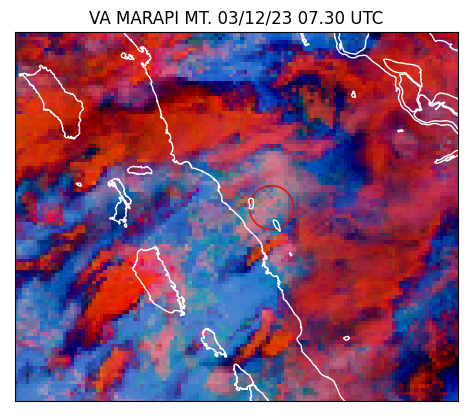

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


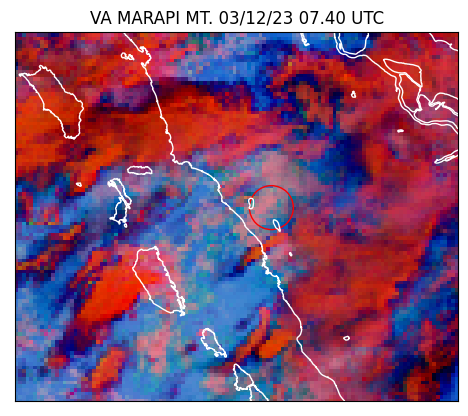

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


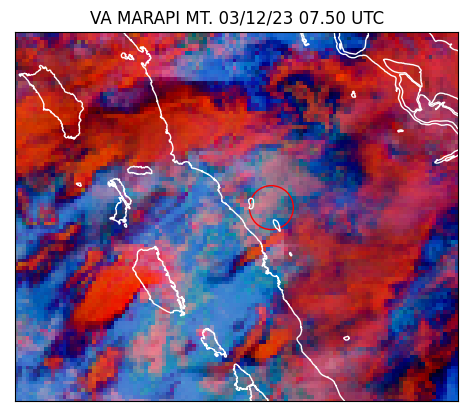

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


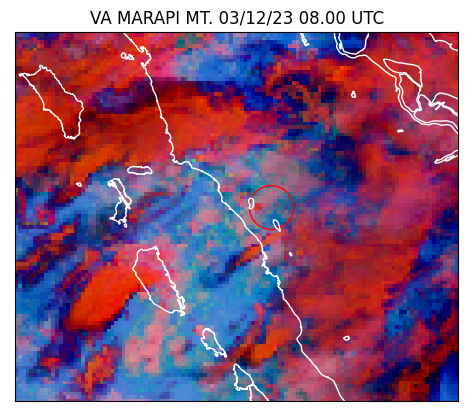

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


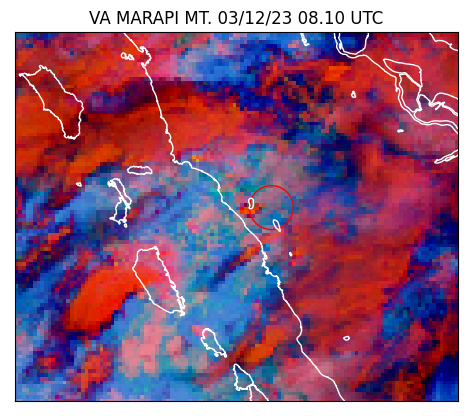

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


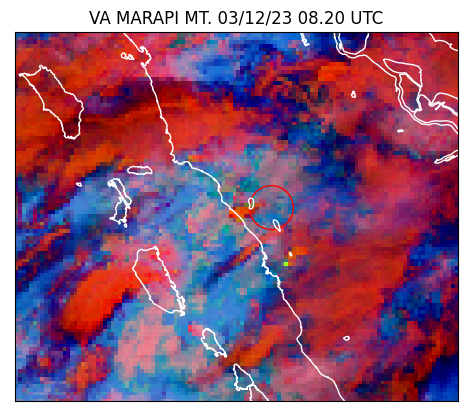

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


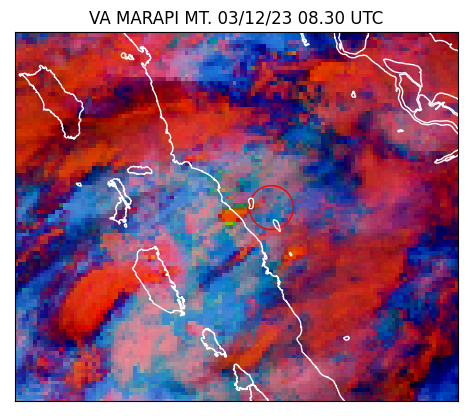

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


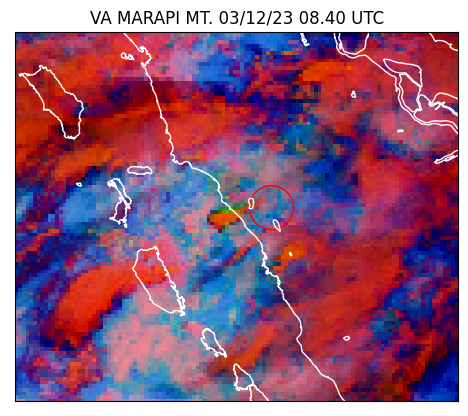

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


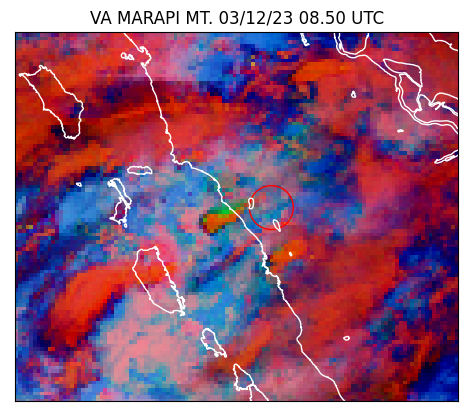

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


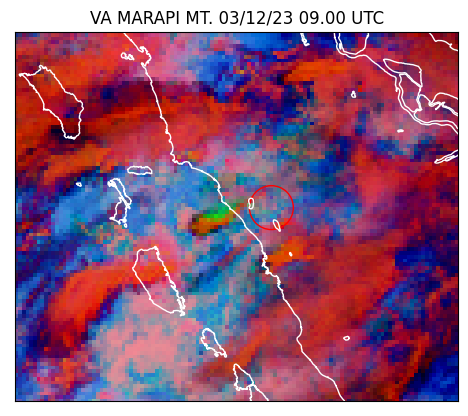

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


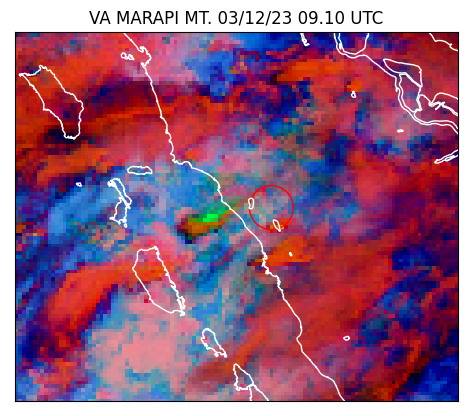

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


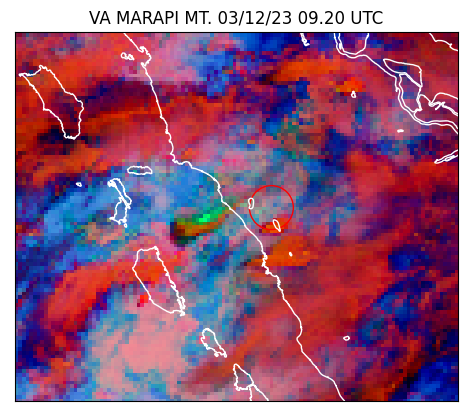

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


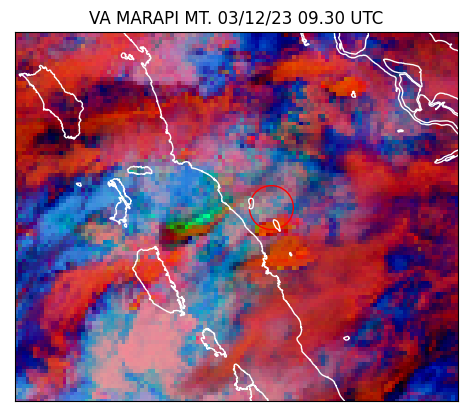

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


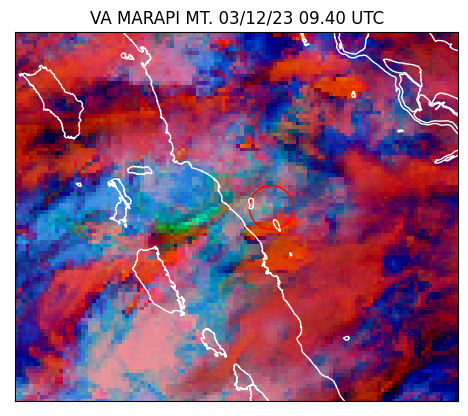

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


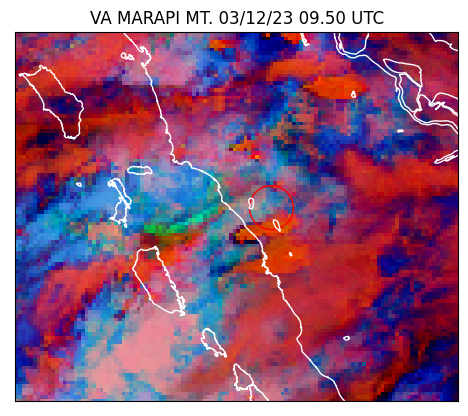

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


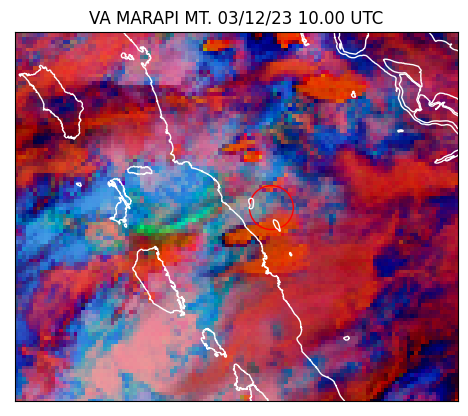

In [40]:
PATH = '/media/evan/A8242CC6242C9978/'

data1 = PATH+'NC_H09_20231203_0730_R21_FLDK.02401_02401.nc'
data2 = PATH+'NC_H09_20231203_0740_R21_FLDK.02401_02401.nc'
data3 = PATH+'NC_H09_20231203_0750_R21_FLDK.02401_02401.nc'
data4 = PATH+'NC_H09_20231203_0800_R21_FLDK.02401_02401.nc'
data41 = PATH+'NC_H09_20231203_0810_R21_FLDK.02401_02401.nc'
data42 = PATH+'NC_H09_20231203_0820_R21_FLDK.02401_02401.nc'
data5 = PATH+'NC_H09_20231203_0830_R21_FLDK.02401_02401.nc'
data51 = PATH+'NC_H09_20231203_0840_R21_FLDK.02401_02401.nc'
data6 = PATH+'NC_H09_20231203_0850_R21_FLDK.02401_02401.nc'
data7 = PATH+'NC_H09_20231203_0900_R21_FLDK.02401_02401.nc'
data8 = PATH+'NC_H09_20231203_0910_R21_FLDK.02401_02401.nc'
data9 = PATH+'NC_H09_20231203_0920_R21_FLDK.02401_02401.nc'
data10 = PATH+'NC_H09_20231203_0930_R21_FLDK.02401_02401.nc'
data11 = PATH+'NC_H09_20231203_0940_R21_FLDK.02401_02401.nc'
data12 = PATH+'NC_H09_20231203_0950_R21_FLDK.02401_02401.nc'
data13 = PATH+'NC_H09_20231203_1000_R21_FLDK.02401_02401.nc'



plot1 = rgb1(data1,PATH, 'VA MARAPI MT. 03/12/23 07.30 UTC',1, circles=[(100.47024, -0.38203, 10)])
plot2 = rgb1(data2,PATH, 'VA MARAPI MT. 03/12/23 07.40 UTC',2, circles=[(100.47024, -0.38203, 10)])
plot3 = rgb1(data3,PATH, 'VA MARAPI MT. 03/12/23 07.50 UTC',3, circles=[(100.47024, -0.38203, 10)])
plot4 = rgb1(data4,PATH, 'VA MARAPI MT. 03/12/23 08.00 UTC',4, circles=[(100.47024, -0.38203, 10)])
plot5 = rgb1(data41,PATH, 'VA MARAPI MT. 03/12/23 08.10 UTC',5, circles=[(100.47024, -0.38203, 10)])
plot6 = rgb1(data42,PATH, 'VA MARAPI MT. 03/12/23 08.20 UTC',6, circles=[(100.47024, -0.38203, 10)])
plot7 = rgb1(data5,PATH, 'VA MARAPI MT. 03/12/23 08.30 UTC',7, circles=[(100.47024, -0.38203, 10)])
plot8 = rgb1(data51,PATH, 'VA MARAPI MT. 03/12/23 08.40 UTC',8, circles=[(100.47024, -0.38203, 10)])
plot9 = rgb1(data6,PATH, 'VA MARAPI MT. 03/12/23 08.50 UTC',9, circles=[(100.47024, -0.38203, 10)])
plot10 = rgb1(data7,PATH, 'VA MARAPI MT. 03/12/23 09.00 UTC',10, circles=[(100.47024, -0.38203, 10)])
plot11 = rgb1(data8,PATH, 'VA MARAPI MT. 03/12/23 09.10 UTC',11,circles=[(100.47024, -0.38203, 10)])
plot12 = rgb1(data9,PATH, 'VA MARAPI MT. 03/12/23 09.20 UTC',12, circles=[(100.47024, -0.38203, 10)])
plot13 = rgb1(data10,PATH, 'VA MARAPI MT. 03/12/23 09.30 UTC',13, circles=[(100.47024, -0.38203, 10)])
plot14 = rgb1(data11,PATH, 'VA MARAPI MT. 03/12/23 09.40 UTC',14,circles=[(100.47024, -0.38203, 10)])
plot15 = rgb1(data12,PATH, 'VA MARAPI MT. 03/12/23 09.50 UTC',15, circles=[(100.47024, -0.38203, 10)])
plot16 = rgb1(data13,PATH, 'VA MARAPI MT. 03/12/23 10.00 UTC',16, circles=[(100.47024, -0.38203, 10)])








In [4]:

def create_gif(image_files, output_path, duration=500):
    images = [Image.open(img) for img in image_files]

    # Save as GIF
    images[0].save(
        output_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )

# Example usage
image_files = [PATH+'1.png', PATH+'2.png', PATH+'3.png', PATH+'4.png', PATH+'5.png', PATH+'6.png', PATH+'7.png', PATH+'8.png', PATH+'9.png', PATH+'10.png', PATH+'11.png', PATH+'12.png', PATH+'13.png', PATH+'14.png', PATH+'15.png', PATH+'16.png']
output_path = PATH+'output.gif'
create_gif(image_files, output_path)
